Nama: Mohammad Daffa Gashandy

NIM: 20/455449/PA/19664

Kelas: KOMB

In [ ]:
# Using iris data
from google.colab import files
files.upload()

Saving iris.csv to iris.csv


{'iris.csv': b'sepal_length,sepal_width,petal_length,petal_width,species\n5.1,3.5,1.4,0.2,setosa\n4.9,3.0,1.4,0.2,setosa\n4.7,3.2,1.3,0.2,setosa\n4.6,3.1,1.5,0.2,setosa\n5.0,3.6,1.4,0.2,setosa\n5.4,3.9,1.7,0.4,setosa\n4.6,3.4,1.4,0.3,setosa\n5.0,3.4,1.5,0.2,setosa\n4.4,2.9,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5.4,3.7,1.5,0.2,setosa\n4.8,3.4,1.6,0.2,setosa\n4.8,3.0,1.4,0.1,setosa\n4.3,3.0,1.1,0.1,setosa\n5.8,4.0,1.2,0.2,setosa\n5.7,4.4,1.5,0.4,setosa\n5.4,3.9,1.3,0.4,setosa\n5.1,3.5,1.4,0.3,setosa\n5.7,3.8,1.7,0.3,setosa\n5.1,3.8,1.5,0.3,setosa\n5.4,3.4,1.7,0.2,setosa\n5.1,3.7,1.5,0.4,setosa\n4.6,3.6,1.0,0.2,setosa\n5.1,3.3,1.7,0.5,setosa\n4.8,3.4,1.9,0.2,setosa\n5.0,3.0,1.6,0.2,setosa\n5.0,3.4,1.6,0.4,setosa\n5.2,3.5,1.5,0.2,setosa\n5.2,3.4,1.4,0.2,setosa\n4.7,3.2,1.6,0.2,setosa\n4.8,3.1,1.6,0.2,setosa\n5.4,3.4,1.5,0.4,setosa\n5.2,4.1,1.5,0.1,setosa\n5.5,4.2,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5.0,3.2,1.2,0.2,setosa\n5.5,3.5,1.3,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n4.4,3.0,1.3,0.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = '/content/iris.csv'
df = pd.read_csv(path)

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# only 2 classes (setosa and versicolor)
df.drop(df[df.species=='virginica'].index, inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [ ]:
# only two features
df.drop(columns=['sepal_length', 'sepal_width'], inplace=True)
df

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
95,4.2,1.2,versicolor
96,4.2,1.3,versicolor
97,4.3,1.3,versicolor
98,3.0,1.1,versicolor


In [ ]:
# Proses untuk membagi training data dan test data dengan balance

# mengurutkan data terlebih dahulu sesuai dengan kelas target
df.sort_values("species", ascending=True)

# atribut untuk pembagian kelas 
n_class = 2
n_data = len(df)
n_data_each_class = int(n_data/n_class)

# membuat sebuah list yang akan digunakan untuk melakukan reindex
# reindex dilakukan untuk mengubah urutan baris menjadi heterogen berpola
# contoh : baris akan mengikuti pola (kelas 1, kelas 2, kelas 3, kelas 1, kelas 2, kelas 3, dst...)
n = []
i = 0
for i in range(0, n_data_each_class):
  for i in range(i, n_data, n_data_each_class):
    n.append(i)
  i += 1

In [ ]:
# mengatur ulang index dengan pola yang telah dibuat
dataset = df.reindex(n).reset_index(drop=True)
dataset

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,4.7,1.4,versicolor
2,1.4,0.2,setosa
3,4.5,1.5,versicolor
4,1.3,0.2,setosa
...,...,...,...
95,4.3,1.3,versicolor
96,1.5,0.2,setosa
97,3.0,1.1,versicolor
98,1.4,0.2,setosa


In [ ]:
# membagi dataset menjadi data training (80%) dan data testing (20%)
train = int(len(df)* 0.8)
X_train = dataset.iloc[:train,:2]
Y_train = dataset.iloc[:train,2:]
X_test = dataset.iloc[train:,:2]
Y_test = dataset.iloc[train:,2:]
Y_train

,species
0,setosa
1,versicolor
2,setosa
3,versicolor
4,setosa
...,...
75,versicolor
76,setosa
77,versicolor
78,setosa


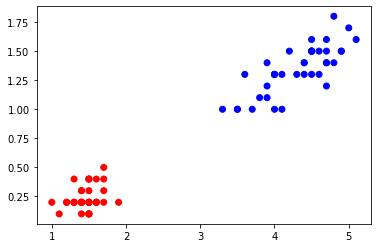

In [ ]:
# memvisualisasi training data
colors = {'setosa': 'red', 'versicolor': 'blue'}

plt.scatter(x=X_train['petal_length'], y=X_train['petal_width'], c=Y_train['species'].map(colors))

plt.show()

In [ ]:
# Replace 'setosa' and 'versicolor' with 0 and 1
Y_train['species'].mask(Y_train['species'] == 'versicolor', 1, inplace=True)
Y_train['species'].mask(Y_train['species'] == 'setosa', 0, inplace=True)

Y_test['species'].mask(Y_test['species'] == 'versicolor', 1, inplace=True)
Y_test['species'].mask(Y_test['species'] == 'setosa', 0, inplace=True)
Y_train

,species
0,0
1,1
2,0
3,1
4,0
...,...
75,1
76,0
77,1
78,0


In [ ]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [ ]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [ ]:
print("Shape of x_train: ", X_train.shape)
print("Shape of y_train: ", Y_train.shape)
print("Shape of x_test: ", X_test.shape)
print("Shape of y_test: ", Y_test.shape)

Shape of x_train:  (2, 80)
Shape of y_train:  (1, 80)
Shape of x_test:  (2, 20)
Shape of y_test:  (1, 20)


In [ ]:
# sigmoid function
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [ ]:
# cost function
def cost(m, Y_train, sigmoid):
  return -(1/m)*np.sum(Y_train*np.log(sigmoid) + (1-Y_train)*np.log(1-sigmoid))

In [ ]:
# Gradient Descent Function
def gradient_descent(m, sigmoid, X_train, Y_train):
  dA = (1/m)*np.dot(sigmoid-Y_train, X_train.T)
  dB = (1/m)*np.sum(sigmoid - Y_train)

  return dA, dB

In [ ]:
# The model for training data
def model(X, Y, learning_rates, iterations):
  m = X.shape[1]
  n = X.shape[0]

  A = np.zeros((n, 1))
  B = 0

  cost_list = []

  for i in range(iterations):
    
    Z = np.array((np.dot(A.T, X) + B), dtype=np.float32)
    sig = sigmoid(Z)

    c = cost(m, Y, sig)

    dA, dB = gradient_descent(m, sig, X, Y)

    A = A - learning_rate*dA.T
    B = B - learning_rate*dB

    cost_list.append(c)
    # untuk melihat penurunan nilai cost
    if(i%(iterations/10) == 0):
      print("cost after ", i, " iteration is: ", c)

  return A, B, cost_list

In [ ]:
learning_rate = 0.001
iteration = 100

A, B, cost_list = model(X_train, Y_train, learning_rate, iteration)

cost after  0  iteration is:  0.6931471824645996
cost after  10  iteration is:  0.6874278768897057
cost after  20  iteration is:  0.6820232674479485
cost after  30  iteration is:  0.6769145637750626
cost after  40  iteration is:  0.672083779424429
cost after  50  iteration is:  0.6675140887498856
cost after  60  iteration is:  0.6631895519793034
cost after  70  iteration is:  0.6590951599180699
cost after  80  iteration is:  0.6552167758345604
cost after  90  iteration is:  0.6515411265194416


In [ ]:
# Find thetha that minimize the cost function
learning_rate = 0.5
A, B, cost_list = model(X_train, Y_train, learning_rate, iteration)

cost after  0  iteration is:  0.6931471824645996
cost after  10  iteration is:  0.42297624945640566
cost after  20  iteration is:  0.3164743212983012
cost after  30  iteration is:  0.24899688176810741
cost after  40  iteration is:  0.20374409551732242
cost after  50  iteration is:  0.17178879368584604
cost after  60  iteration is:  0.1482286529382691
cost after  70  iteration is:  0.13023372443858536
cost after  80  iteration is:  0.11608621689956636
cost after  90  iteration is:  0.10469496863661334


In [ ]:
# membuat fungsi accuracy untuk mencoba pada data testing
def accuracy(X, Y, A, B):
  Z = np.array((np.dot(A.T, X) + B), dtype=np.float32)
  sig = sigmoid(Z)

  sig = sig > 0.5

  sig = np.array(sig, dtype=np.int64)

  acc = (1 - np.sum(np.absolute(sig - Y))/Y.shape[1])*100

  print("Accuracy of the model is ", acc, '%')

In [ ]:
accuracy(X_test, Y_test, A, B)

Accuracy of the model is  100.0 %


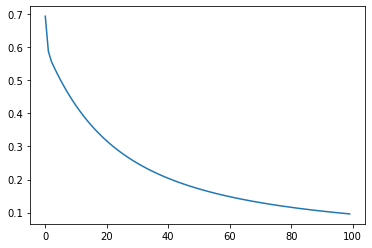

In [ ]:
# memvisualisasikan cost terhadap iterasi
plt.plot(np.arange(iteration), cost_list)